In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd'/content/gdrive/My Drive/soil_dataset'

/content/gdrive/My Drive/soil_dataset


In [3]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from tensorflow.keras import layers,models
import os

In [4]:
data_dir='/content/gdrive/My Drive/soil_dataset/Soil_types'

In [5]:
batch_size = 10
img_height = 224
img_width = 224

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width)
  )

Found 129 files belonging to 5 classes.
Using 104 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width)
  )

Found 129 files belonging to 5 classes.
Using 25 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Cinder Soil', 'Laterite Soil', 'Peat Soil', 'black', 'test']


In [9]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
IMAGE_SIZE = [224, 224]

In [11]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
for layer in vgg.layers:
  layer.trainable = False

In [13]:
folders = glob('/content/gdrive/My Drive/soil_dataset/Soil_types/*')
print(len(folders))

5


In [14]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
from keras import optimizers


optimizer = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [16]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [17]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [18]:
model.compile(
  loss='SparseCategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/soil_dataset/Soil_types',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/soil_dataset/Soil_types',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 129 images belonging to 5 classes.
Found 129 images belonging to 5 classes.


In [20]:

r = model.fit_generator(
  training_set,  
  validation_data=test_set,


  
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/50
9/9 [==============================] - 126s 14s/step - loss: 1.9665 - accuracy: 0.2481 - val_loss: 1.5018 - val_accuracy: 0.4341
Epoch 2/50
9/9 [==============================] - 116s 14s/step - loss: 1.2784 - accuracy: 0.5194 - val_loss: 1.6733 - val_accuracy: 0.4264
Epoch 3/50
9/9 [==============================] - 115s 13s/step - loss: 1.3494 - accuracy: 0.5659 - val_loss: 1.0568 - val_accuracy: 0.5969
Epoch 4/50
9/9 [==============================] - 117s 14s/step - loss: 1.0026 - accuracy: 0.6279 - val_loss: 0.6023 - val_accuracy: 0.8062
Epoch 5/50
9/9 [==============================] - 115s 13s/step - loss: 0.6558 - accuracy: 0.7674 - val_loss: 0.3507 - val_accuracy: 0.8915
Epoch 6/50
9/9 [==============================] - 117s 14s/step - loss: 0.5557 - accuracy: 0.7752 - val_loss: 0.3233 - val_accuracy: 0.9147
Epoch 7/50
9/9 [==============================] - 115s 14s/step - loss: 0.3584 - accuracy: 0.8682 - val_loss: 0.2942 - val_accuracy: 0.8992
Epoch 8/50
9/9 [====

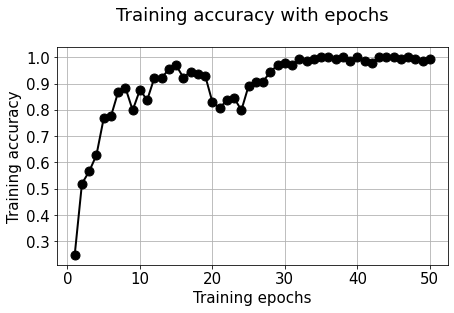

In [26]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(50)],r.history['accuracy'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()












In [27]:
model.save("Soil.h5")